#**Actividad 00 — EDA y preparación de datos (recopilación, limpieza, unión) - Análisis exploratorio de datos**

* Valeria Gisel Concha Valdovinos // A01657886

* Melissa Dorantes Martínez // A01700634

* María Alejandra Munévar Díaz // A01710026

* Bruno Jasso Juárez // A01205116


### **Introducción**

El presente reporte tiene como propósito realizar un Análisis Exploratorio de Datos (EDA) de los tres conjuntos de información proporcionados por Bepensa: Telemetría, Peajes y Combustible. El objetivo principal fue entender la estructura, calidad y comportamiento de los datos para posteriormente desarrollar un esquema conceptual y lógico que permita su uso en modelos enfocados en la planificación y gestión de la demanda dentro de operaciones logísticas.

A lo largo del análisis seguimos una metodología común para cada dataset, comenzando por la ingesta y limpieza de los archivos, seguida por una inspección detallada de la calidad de la información en términos de nulos, duplicados, cardinalidades, tipos de datos y presencia de outliers. Posteriormente, construimos la taxonomía de variables con base en su naturaleza y su potencial rol operativo dentro de la red nomológica. Después, aplicamos diferentes técnicas de visualización como: histogramas, boxplots, KDE plots, correlaciones y series de tiempo con el fin de interpretar patrones relevantes, identificar comportamientos anómalos y obtener insights operativos sobre la flota, los costos y la eficiencia logística. Finalmente, se concluye con un conjunto de KPIs recomendados que servirán como base para futuros modelos predictivos y de optimización.

Este proceso no solo permitirá comprender mejor los datos, sino también identificar oportunidades para mejorar su calidad y aprovecharlos estratégicamente en la toma de decisiones logísticas.

**El siguiente reporte sigue la siguiente estructura para cada dataset:**

1. Ingesta de datos: Telemetría, Peajes, Combustible (Enero, Ferbrero, Agosto, Septiembre)

2. Inspección de calidad: En esta parte se se observaron los valores normales, valores faltantes, tipos, cardinalidades, duplicados, outliers temporales y geográficos.

3. Linking keys: Para Telemetría es la columna `Nombre` y para Peajes es la comuna `No.Economico`

4. Taxonomía de variables

5. Análisis exploratorio (gráficas + interpretaciones)

6. KPIs propuestos

7. Conclusiones generales

### TAXONOMÍA DE VARIABLES
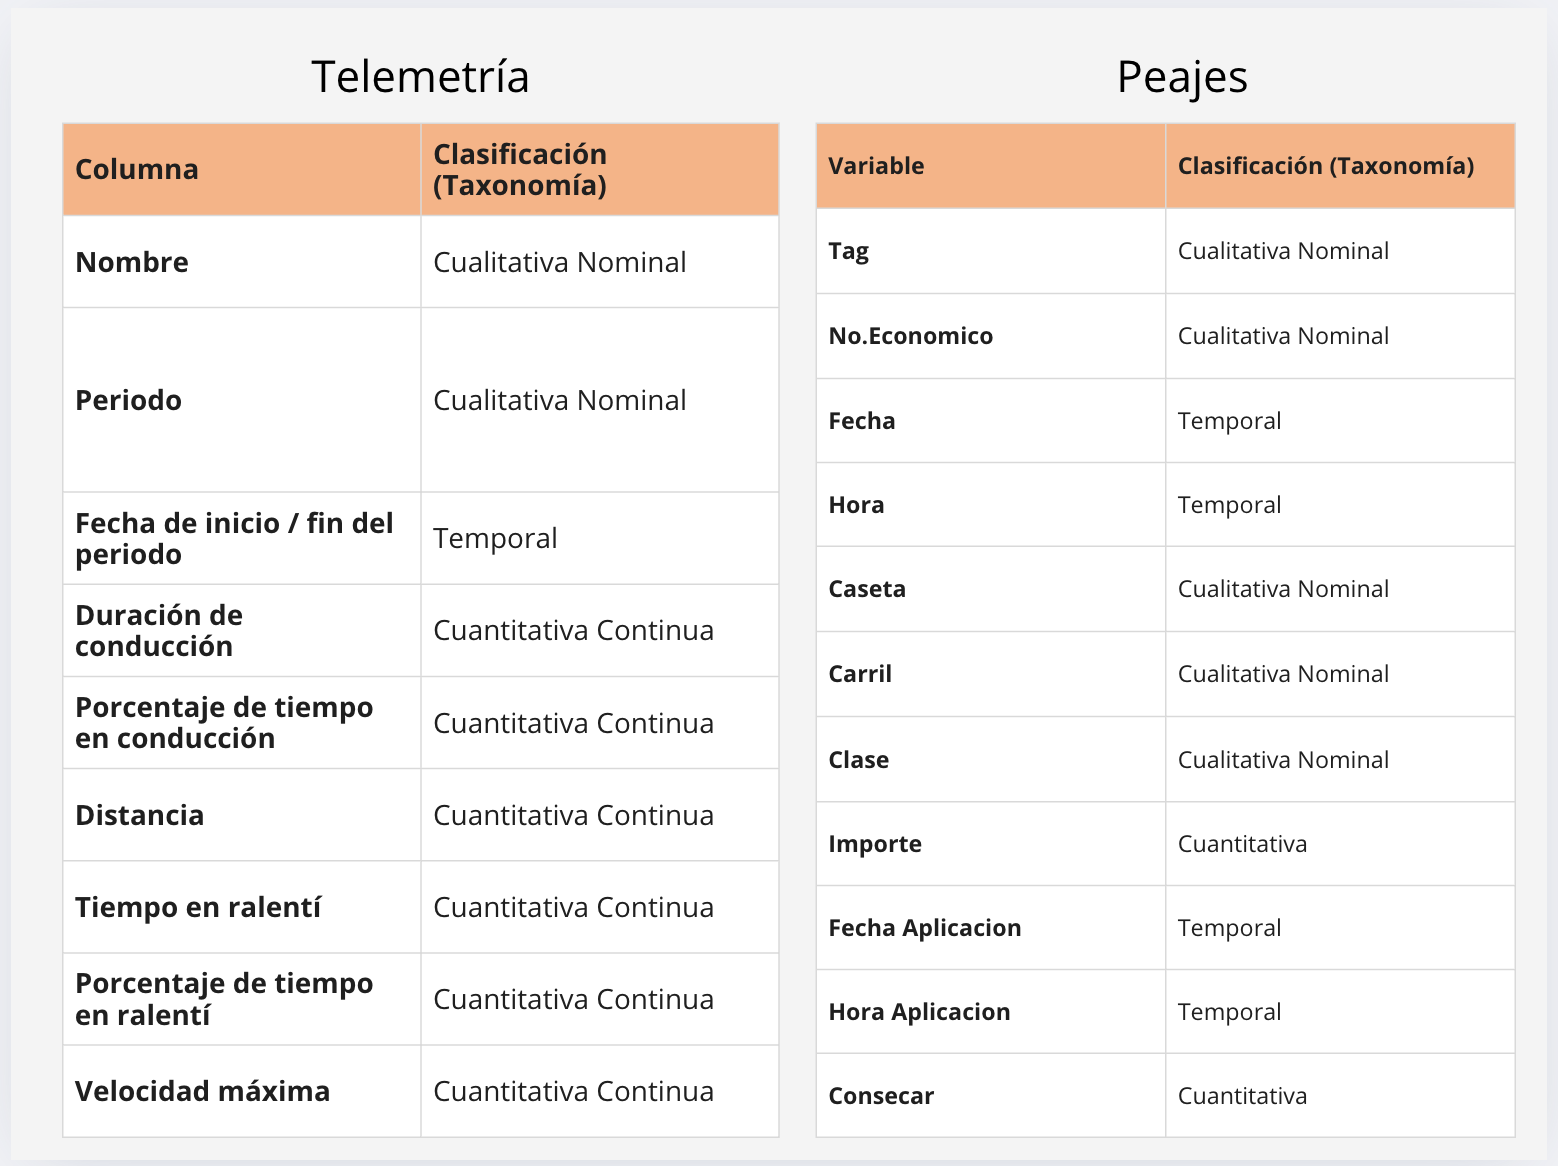

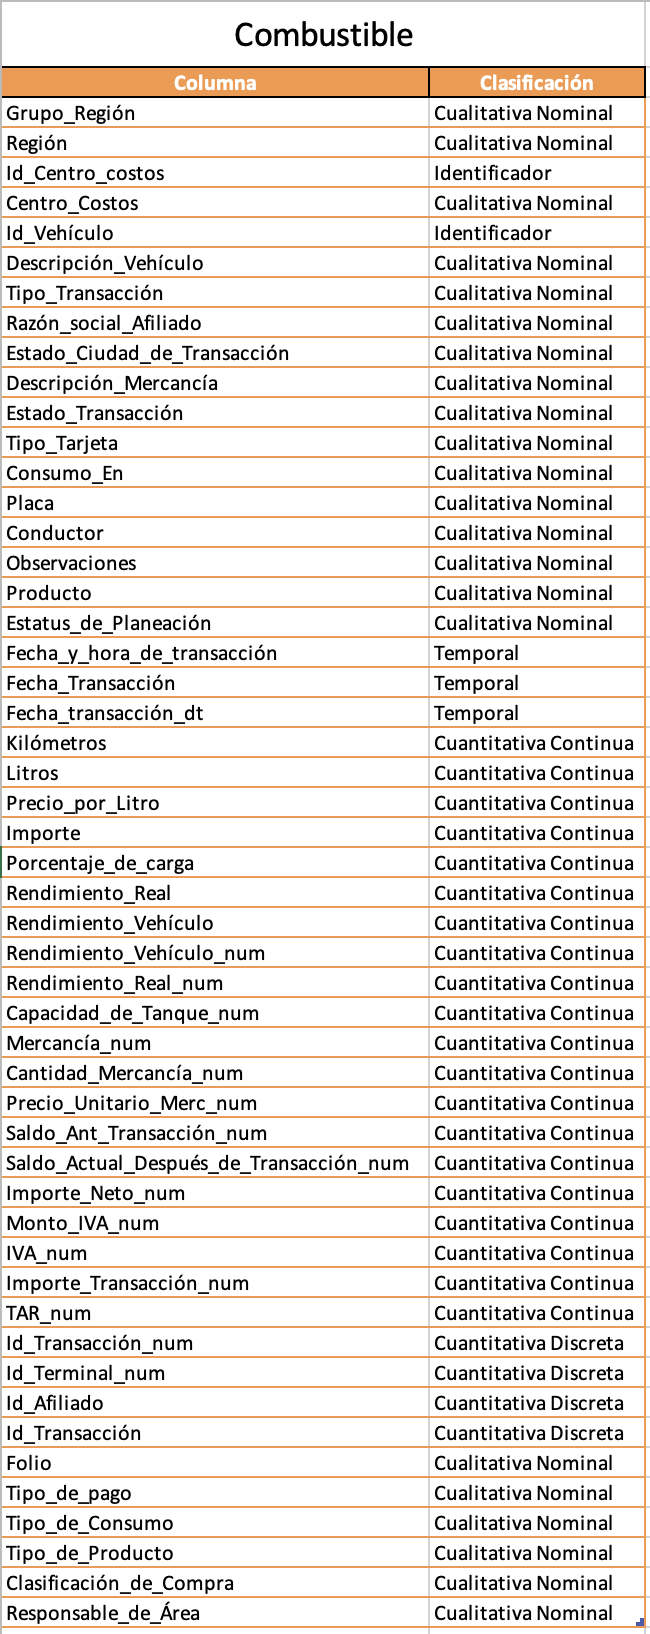

In [ ]:
#Importación de librerias

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


## Telemtería historico

In [ ]:
telemetria = pd.read_excel('Telemetría.xlsx', sheet_name= 'Report', header=0, usecols='A:J' )
telemetria.head()

,Nombre,Periodo,Fecha de inicio del periodo,Fecha de fin del periodo,Duración de conducción,Porcentaje de tiempo en conducción,Distancia,Tiempo en ralentí,Porcentaje de tiempo en ralentí,Velocidad máxima
0,M7,1,2024-01-01,2024-01-31 23:59:59,0 days 00:00:00,0,0.000000,0 days 00:00:00,0,0
1,M8,1,2024-01-01,2024-01-31 23:59:59,6 days 21:56:19.127000,22,865.979980,9 days 08:27:07,57,42
2,M9,1,2024-01-01,2024-01-31 23:59:59,0 days 00:00:00,0,0.000000,0 days 00:00:00,0,0
3,T263,1,2024-01-01,2024-01-31 23:59:59,0 days 00:00:00,0,0.000000,0 days 00:00:00,0,0
4,T290,1,2024-01-01,2024-01-31 23:59:59,3 days 13:15:46.545000,11,1211.847656,0 days 11:01:57,11,92


In [ ]:
telemetria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7601 entries, 0 to 7600
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype          
---  ------                              --------------  -----          
 0   Nombre                              7601 non-null   object         
 1   Periodo                             7601 non-null   int64          
 2   Fecha de inicio del periodo         7601 non-null   datetime64[ns] 
 3   Fecha de fin del periodo            7601 non-null   datetime64[ns] 
 4   Duración de conducción              7601 non-null   timedelta64[ns]
 5   Porcentaje de tiempo en conducción  7601 non-null   int64          
 6   Distancia                           7601 non-null   float64        
 7   Tiempo en ralentí                   7601 non-null   timedelta64[ns]
 8   Porcentaje de tiempo en ralentí     7601 non-null   int64          
 9   Velocidad máxima                    7601 non-null   int64          
dtypes: datetime6

In [ ]:
telemetria.isnull().sum().sum() #Este dataset no tiene nulos

np.int64(0)

In [ ]:
telemetria.duplicated().sum() #Este dataset tiene 9 duplicados

np.int64(9)

In [ ]:
telemetria = telemetria.drop_duplicates()

In [ ]:
# Nos aseguramos que ya no tenemos duplicados
telemetria.duplicated().sum()

np.int64(0)

In [ ]:
telemetria.shape #Este data set tiene 3526 filas y 6 columnas

(7592, 10)

In [ ]:
telemetria.nunique().sort_values(ascending=False) #Cardinalidad de los datos

,0
Duración de conducción,5397
Distancia,5393
Tiempo en ralentí,5338
Nombre,376
Velocidad máxima,101
Porcentaje de tiempo en ralentí,101
Porcentaje de tiempo en conducción,50
Periodo,20
Fecha de inicio del periodo,20
Fecha de fin del periodo,20


In [ ]:
#Outliers temporales
Q1 = telemetria['Duración de conducción'].quantile(0.25)
Q3 = telemetria['Duración de conducción'].quantile(0.75)
IQR = Q3 - Q1

outliers_tiempo = telemetria[
    (telemetria['Duración de conducción'] < Q1 - 1.5 * IQR) |
    (telemetria['Duración de conducción'] > Q3 + 1.5 * IQR)
]

print(f"Outliers temporales detectados: {len(outliers_tiempo)}")


Outliers temporales detectados: 0


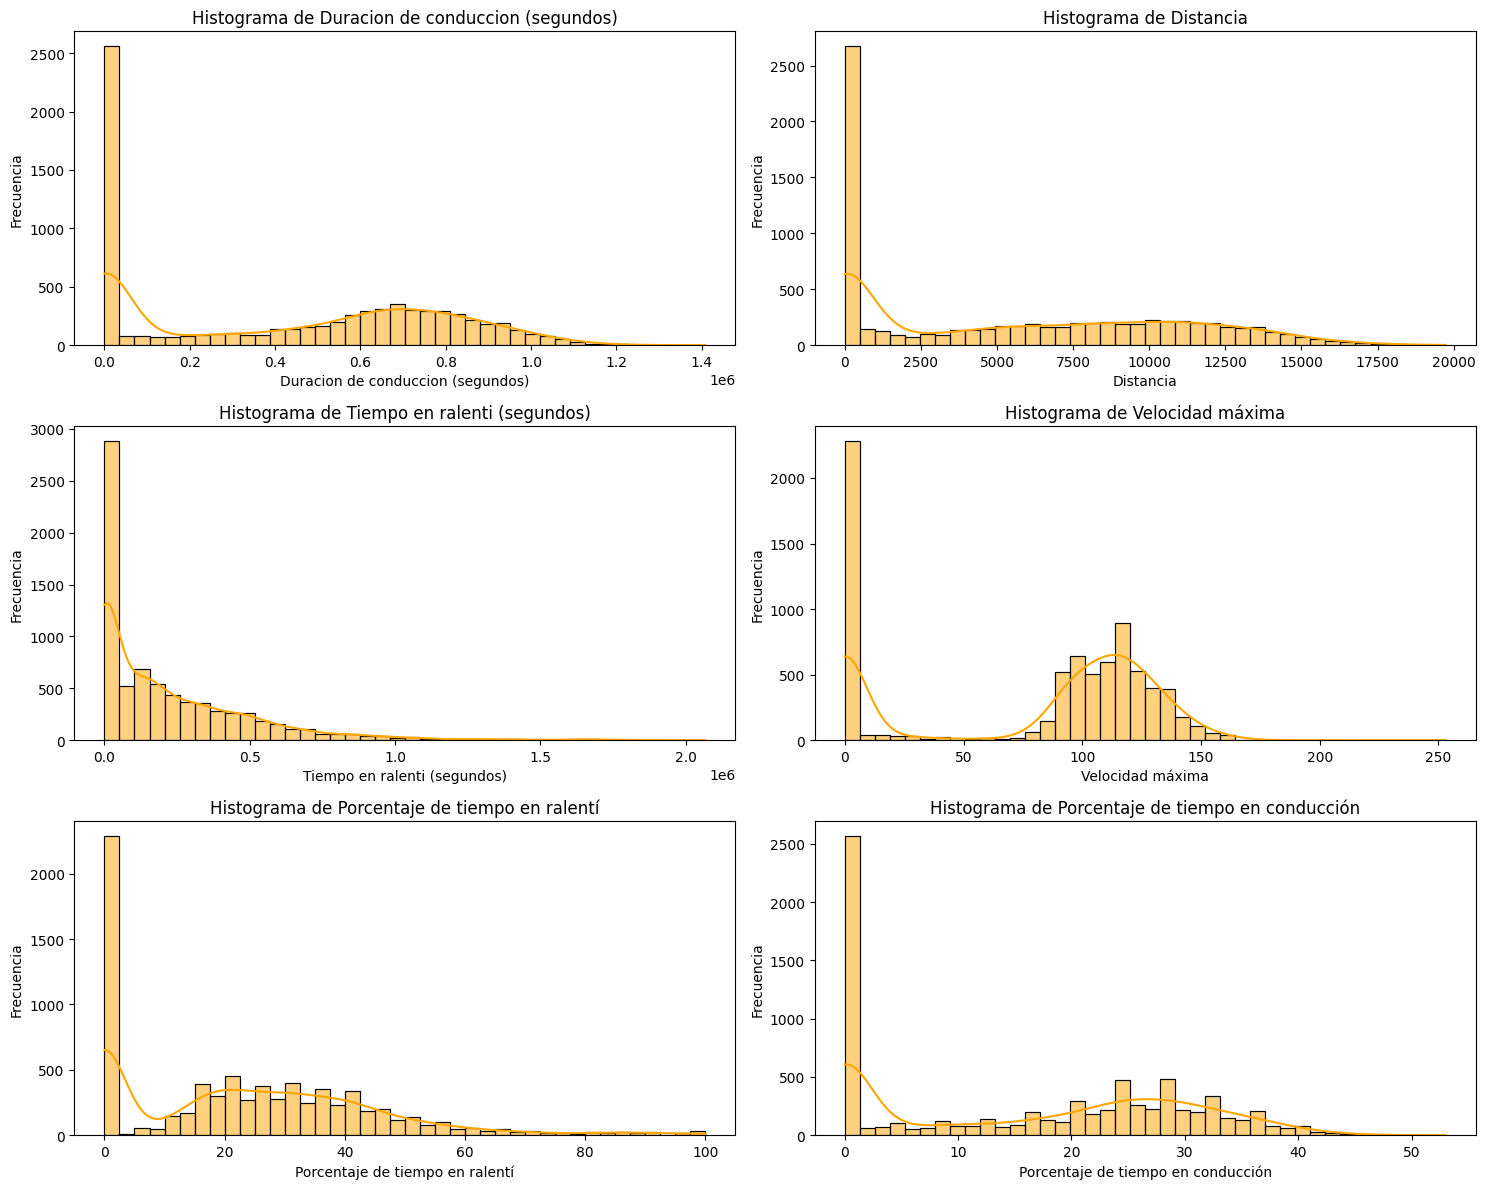

In [ ]:
# Convertimos a timedelta las columnas
telemetria['Duracion de conduccion (segundos)'] = telemetria['Duración de conducción'].dt.total_seconds()
telemetria['Tiempo en ralenti (segundos)'] = telemetria['Tiempo en ralentí'].dt.total_seconds()

cols_numericas_to_plot = [
    'Duracion de conduccion (segundos)',
    'Distancia',
    'Tiempo en ralenti (segundos)',
    'Velocidad máxima',
    'Porcentaje de tiempo en ralentí',
    'Porcentaje de tiempo en conducción'
]

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols_numericas_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(telemetria[col], bins=40, kde=True, color='orange')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

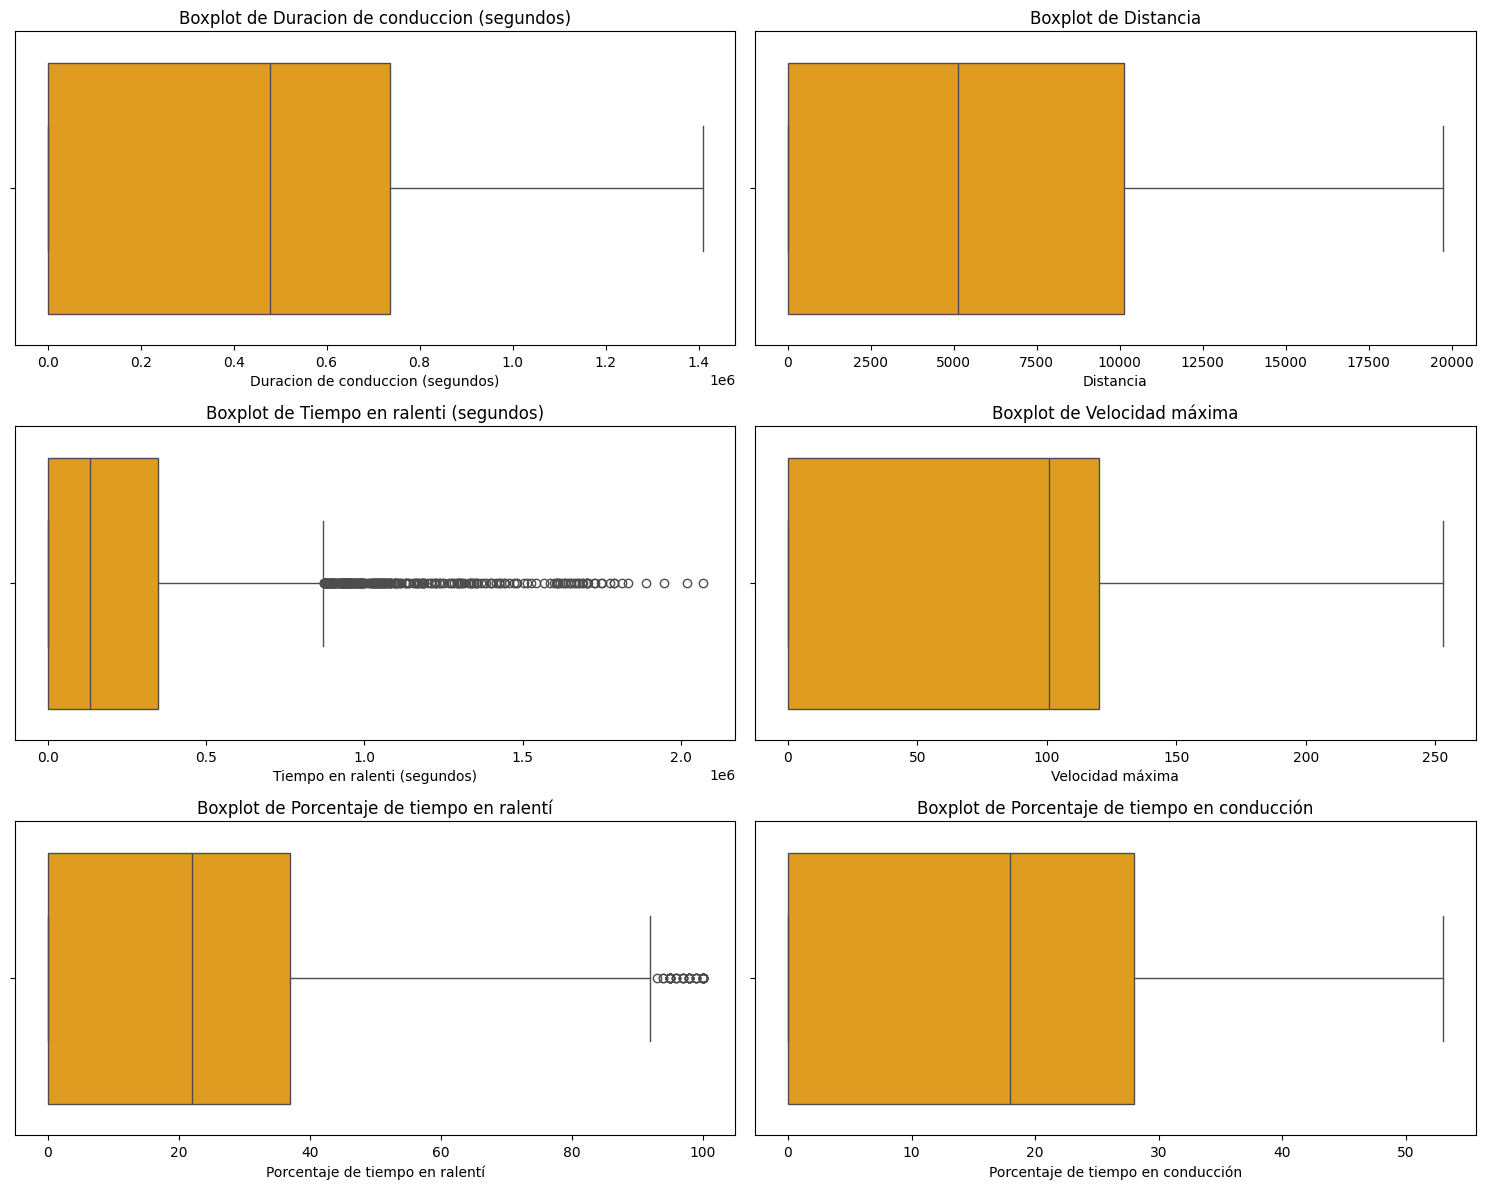

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols_numericas_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=telemetria[col], color='orange')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [ ]:
telemetria.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7592 entries, 0 to 7600
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype          
---  ------                              --------------  -----          
 0   Nombre                              7592 non-null   object         
 1   Periodo                             7592 non-null   int64          
 2   Fecha de inicio del periodo         7592 non-null   datetime64[ns] 
 3   Fecha de fin del periodo            7592 non-null   datetime64[ns] 
 4   Duración de conducción              7592 non-null   timedelta64[ns]
 5   Porcentaje de tiempo en conducción  7592 non-null   int64          
 6   Distancia                           7592 non-null   float64        
 7   Tiempo en ralentí                   7592 non-null   timedelta64[ns]
 8   Porcentaje de tiempo en ralentí     7592 non-null   int64          
 9   Velocidad máxima                    7592 non-null   int64          
 10  Duracion de condu

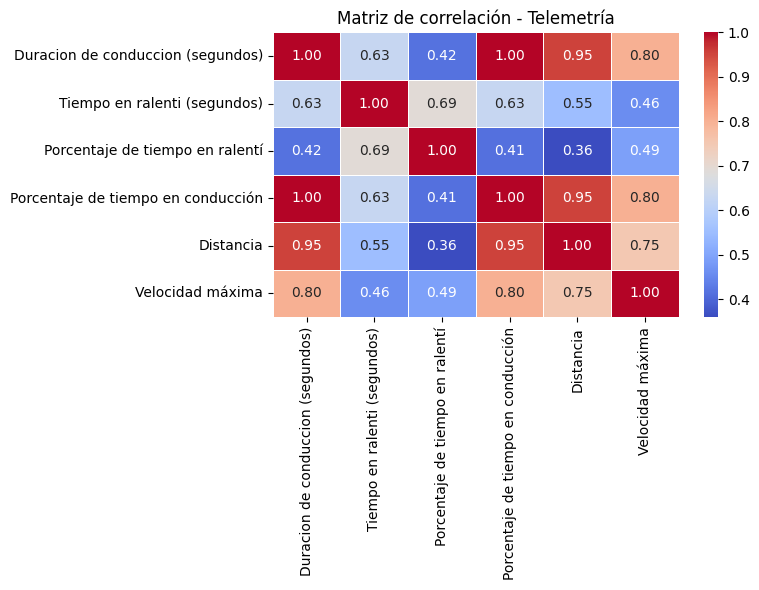

In [ ]:
# Seleccionamos columnas numéricas principales
cols_corr = [
    "Duracion de conduccion (segundos)",
    "Tiempo en ralenti (segundos)",
    "Porcentaje de tiempo en ralentí",
    "Porcentaje de tiempo en conducción",
    "Distancia",
    "Velocidad máxima"
]

corr = telemetria[cols_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Matriz de correlación - Telemetría")
plt.tight_layout()
plt.show()

### Heatmap

Se hicieron las siguientes observaciones:

1. Las correlaciones fuertes con Duración y Distancia (0.80 y 0.75) confirman que la velocidad máxima es una métrica de rendimiento que crece con el alcance de la operación

2. Reducir el tiempo en ralentí (mantener el motor encendido sin moverse) no solo ahorra combustible, sino que, según esta correlación, puede aumentar el tiempo productivo de la flota. Correlación (-0.63)

3. Las correlaciones muy fuertes (cercanas a 1.0) entre Distancia, Duración de Conducción y Porcentaje de Tiempo en Conducción indican que el sistema de telemetría está registrando las variables primarias de movimiento de manera consistente y lógica.


###Duración de conducción (segundos)

En los histogramas se puede observar que hay una distribución altamente sesgada a la derecha y que la gran mayoría de los trayectos tienen duraciones muy cortas, sin embargo también existe un grupo considerable con duraciones extremadamente altas, incluso cercanas a 1,4 millones de segundos (16 días).

En cuanto a las boxplots se pueden observar una gran catidad de outliers, es decir, hay trayectos fuera de patrones normales. Ya que, la mediana está relativamente baja, pero la dispersión es enorme.

De este analisis se pueden obtener los siguientes insights:

* Hay posibles errores de registro, por ejemplo unidades que no finalizaron
un viaje en sistema.

* Podrían existir operaciones continuas (turnos largos), pero los valores parecen anómalos.

###Distancia

En los histogramas se observa que la distribución está también sesgada a la derecha, con una alta concentración de trayectos muy cortos y un incremento progresivo hacia distancias medianas. Aun así, se presentan valores que alcanzan hasta 20,000 metros, lo que indica trayectos largos o atípicos dentro de la operación.

En los boxplots se aprecia una gran cantidad de outliers que superan significativamente el rango intercuartílico. Aunque la distancia tiene una distribución más estable que la duración, sigue mostrando una dispersión considerable.

De este análisis se pueden obtener los siguientes insights:

* Predominan viajes cortos típicos de operación urbana.

* Los viajes largos podrían ser entregas especiales, rutas intermunicipales o errores del sensor.

### Porcentaje de tiempo en ralentí (%)

En los histogramas se observa que la mayor parte de los registros se concentra en los valores más bajos (entre 0% y 40%). No obstante, existen valores que alcanzan el 100%, lo cual nos dice que durante el periodo analizado algunos vehículos estuvieron encendidos sin movimiento todo el tiempo, lo cual es improbable y apunta a fallos de registro.

En las boxplots se evidencian múltiples outliers, especialmente en rangos altos del porcentaje. La distribución central es ancha, lo que indica variabilidad significativa en las prácticas de operación.

De este análisis se pueden obtener los siguientes insights:

* La presencia de porcentajes de ralentí cercanos al 100% indica errores o datos incompletos.

* También puede reflejar zonas de espera prolongada o tiempos muertos excesivos.

### Porcentaje de tiempo en conducción (%)

En los histogramas se presenta una distribución más uniforme que en otras variables, aunque sigue existiendo un sesgo hacia la derecha. La mayoría de los valores se concentran entre 0% y 40%, lo que indica que el tiempo efectivo en movimiento es bajo en comparación con el tiempo total del periodo. Los valores máximos rondan el 50%.

En las boxplots se muestra dispersión, aunque con menos outliers que otras métricas. La distribución es más estable, lo que indica que esta variable podría ser una de las más confiables del dataset.

De este análisis se pueden obtener los siguientes insights:

* El porcentaje de tiempo en conducción es relativamente bajo, lo que indica tiempos muertos significativos.

* Esto puede reflejar trafico, tiempos de carga/descarga o ineficiencias en la planificación de rutas.

### Velocidad máxima (km/h)

En los histogramas se observa una distribución mucho más estable que en las otras variables, con un comportamiento similar al de una distribución normal. La mayoría de los valores se encuentran entre 80 y 130 km/h, lo cual es consistente con operaciones que combinan zonas urbanas y carreteras. Existen algunos valores extremos que llegan hasta 250 km/h.

En las boxplots se observa presencia de outliers, pero en una cantidad mucho menor que en las otras métricas. La dispersión central es más compacta, lo que indica que esta variable es más confiable.

De este análisis se pueden obtener los siguientes insights:

* La velocidad máxima es una de las variables más limpias y estables del dataset.

* Los valores extremadamente altos probablemente se deben a errores del GPS o a saltos en la señal.


###**KPI´s**
* **Utilización del Camión (% de tiempo productivo)**:
Medirá el porcentaje del tiempo total del tracto que se usa en actividades productivas, ya sea de conducción, cargas, descargas, etc. Es vital para el análisis del dataset puesto que refleja la capacidad operacional del tracto y nos muestra si este esa siendo utilizado de la mejor manera. Nos ayuda a formular en la red nomólogica si la capacidad real que tienen los tractos es suficiente para la demanda realizable, por ende poder predecir cuándo se necesitará subcontratar a un tercero.


* **Tiempo Promedio entre Mantenimientos**:
Mide el tiempo que pasa entre cada mantenimiento que sobrelleva el tracto y es importante como un indicador acerca de la funcionalidad del tracto e identificar cuáles son los que presentan más fallas. De igual manera, nos ayudará a la predictibilidad de la demanda puesto que sabremos que, sí un tracto suele tener muchos mantenimiento, afectará los pronósticos de la demanda.

* **Forecast de Utilización (%) por semana**: Cuánto se utilizará el tracto por semana, nos ayudará a predecir picos de demanda o bien, periodos en donde no hay mucha actividad. De la mima manera, también nos ayuda a predecir la contratación de servicios terceros, distribución de la flota, etc.

* **Recomendación de rutas alternativas**: Basado en cuándo se analiza que las rutas habituales hay tráfico lento, se sugieren rutas alternas. Igualmente nos ayuda en la gestión de la demanda además que nos ayudará a mejorar la métrica del OTIF.


## Peajes

In [ ]:
peajes = pd.read_excel('Peajes.xlsx', sheet_name='Peajes', header=0, usecols='A:K' )
peajes.head()

,Tag,No.Economico,Fecha,Hora,Caseta,Carril,Clase,Importe,Fecha Aplicacion,Hora Aplicacion,Consecar
0,IMDM27327805..,T676,2025-09-19,09:07:29,SAN MARCOS,SAN MARCOS 14,5,628.0,NaT,NaN,NaN
1,IMDM20974345..,T465,2025-09-19,09:07:22,SAN MARCOS,SAN MARCOS 11,5,628.0,NaT,NaN,NaN
2,IMDM27327802..,T673,2025-09-19,09:03:34,OZUMBA,OZUMBA 10,5,137.0,NaT,NaN,NaN
3,IMDM27327819..,T692,2025-09-19,09:03:18,OZUMBA,OZUMBA 10,5,137.0,NaT,NaN,NaN
4,IMDM27074119..,T606,2025-09-19,09:02:44,NACAJUCA,NACAJUCA 1,5,210.0,NaT,NaN,NaN


## Inspección de calidad

In [ ]:
peajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187036 entries, 0 to 187035
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Tag               187036 non-null  object        
 1   No.Economico      187030 non-null  object        
 2   Fecha             187036 non-null  datetime64[ns]
 3   Hora              187036 non-null  object        
 4   Caseta            187036 non-null  object        
 5   Carril            187036 non-null  object        
 6   Clase             187036 non-null  int64         
 7   Importe           187036 non-null  float64       
 8   Fecha Aplicacion  181245 non-null  datetime64[ns]
 9   Hora Aplicacion   181245 non-null  object        
 10  Consecar          0 non-null       float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 15.7+ MB


In [ ]:
peajes.isnull().sum().sum() #Este dataset tiene nulos

np.int64(198624)

In [ ]:
peajes = peajes.drop(columns=['Consecar'])

In [ ]:
peajes.duplicated().sum() #Este dataset tiene 0 duplicados

np.int64(0)

In [ ]:
peajes.shape #Este data set tiene 3526 filas y 6 columnas

(187036, 10)

Este data set cuenta con una gran cantidad de nulos, sin embargo estos nulos se muestran mas que nada de las columnas de Fecha Aplicación, Hora Aplicación y Consecar.

La columna Consecar viene completamente vacía, por lo que decidimos eliminarla por completo. En cambio, aunque las columnas Fecha Aplicación y Hora Aplicación contienen valores nulos, optamos por no tratarlos, ya que las filas con datos faltantes podrían incluir información valiosa en otras columnas y preferimos conservarlas.

In [ ]:
# Convert 'Fecha', 'Fecha Aplicacion', 'Hora' and 'Hora Aplicacion' to timedelta
peajes['Fecha'] = pd.to_datetime(peajes['Fecha'], dayfirst=True)
peajes['Fecha Aplicacion'] = pd.to_datetime(peajes['Fecha Aplicacion'], dayfirst=True)
peajes['Hora'] = pd.to_timedelta(peajes['Hora'].astype(str))
peajes['Hora Aplicacion'] = pd.to_timedelta(peajes['Hora Aplicacion'].astype(str))

In [ ]:
peajes.nunique().sort_values(ascending=False) #Cardinalidad de los datos

,0
Hora,75397
Carril,1496
Importe,665
Tag,403
No.Economico,376
Caseta,267
Fecha,262
Fecha Aplicacion,25
Clase,10
Hora Aplicacion,1


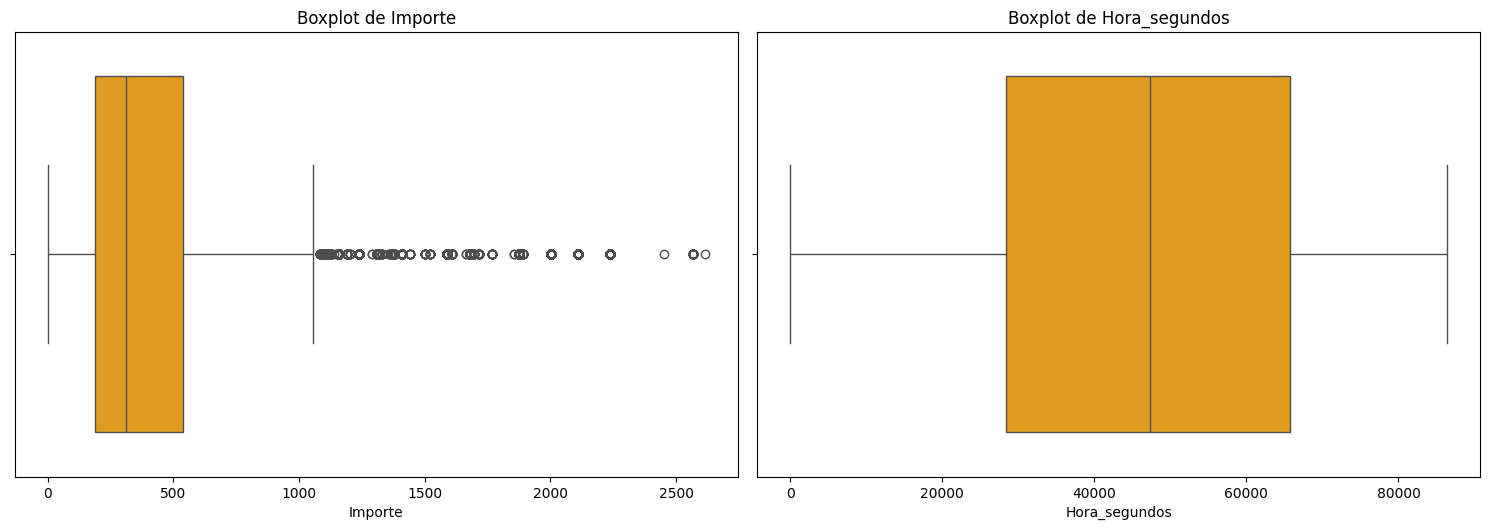

In [ ]:
peajes['Hora_segundos'] = peajes['Hora'].dt.total_seconds()
cols_numericas_peajes = ['Importe', 'Hora_segundos']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_numericas_peajes, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=peajes[col], color='orange')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

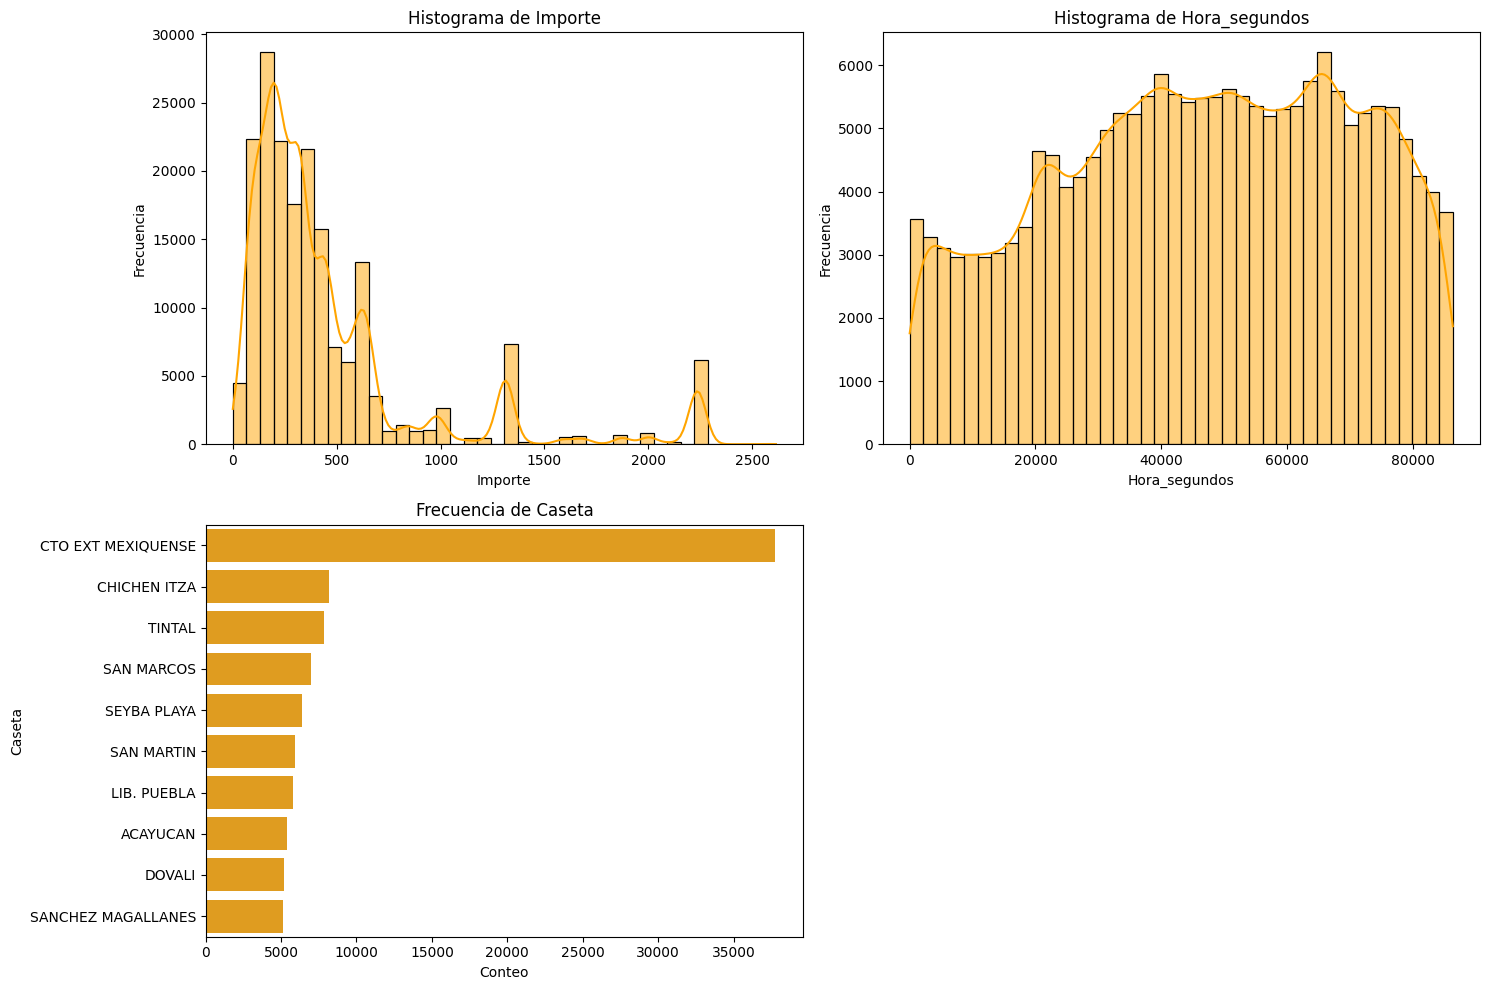

In [ ]:
peajes['Hora_segundos'] = peajes['Hora'].dt.total_seconds()

cols_numericas_peajes = ['Importe', 'Hora_segundos']

plt.figure(figsize=(15, 10))


for i, col in enumerate(cols_numericas_peajes, 1):
    plt.subplot(2, 2, i)
    sns.histplot(peajes[col], bins=40, kde=True, color='orange')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')


plt.subplot(2, 2, 3)
sns.countplot(y=peajes['Caseta'], order=peajes['Caseta'].value_counts().index[:10], color='orange') # Showing top 10 for better visualization
plt.title('Frecuencia de Caseta')
plt.xlabel('Conteo')
plt.ylabel('Caseta')

plt.tight_layout()
plt.show()

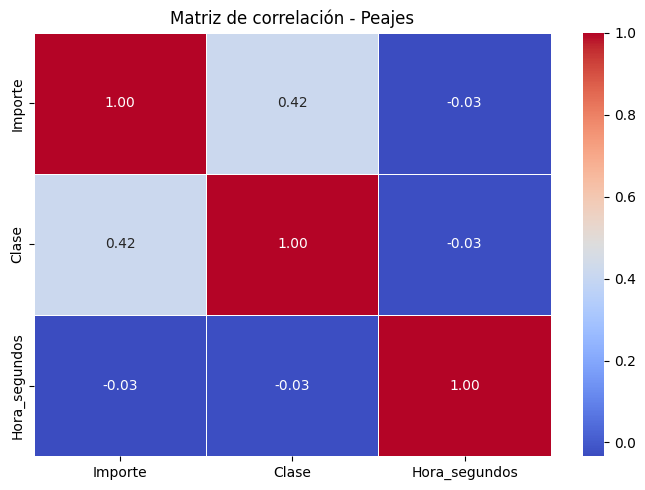

In [ ]:
#Heatmap de las variables númericas

# Seleccionamos solo las columnas numéricas relevantes
cols_peajes = [
    "Importe",
    "Clase",
    "Hora_segundos",
]

# Si Hora está como timedelta, conviértelo:
if "Hora" in peajes.columns:
    peajes["Hora_segundos"] = peajes["Hora"].dt.total_seconds()

# Creamos matriz de correlación
corr_peajes = peajes[cols_peajes].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(
    corr_peajes,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Matriz de correlación - Peajes")
plt.tight_layout()
plt.show()

El costo del peaje está moderadamente determinado por la clase del vehículo. Lo que es un factor importante, pero no el único.

Con la finalidad de mejorar el analisis realizamos unas series de tiempo por día de la semana con el objetivo de identificar patrones

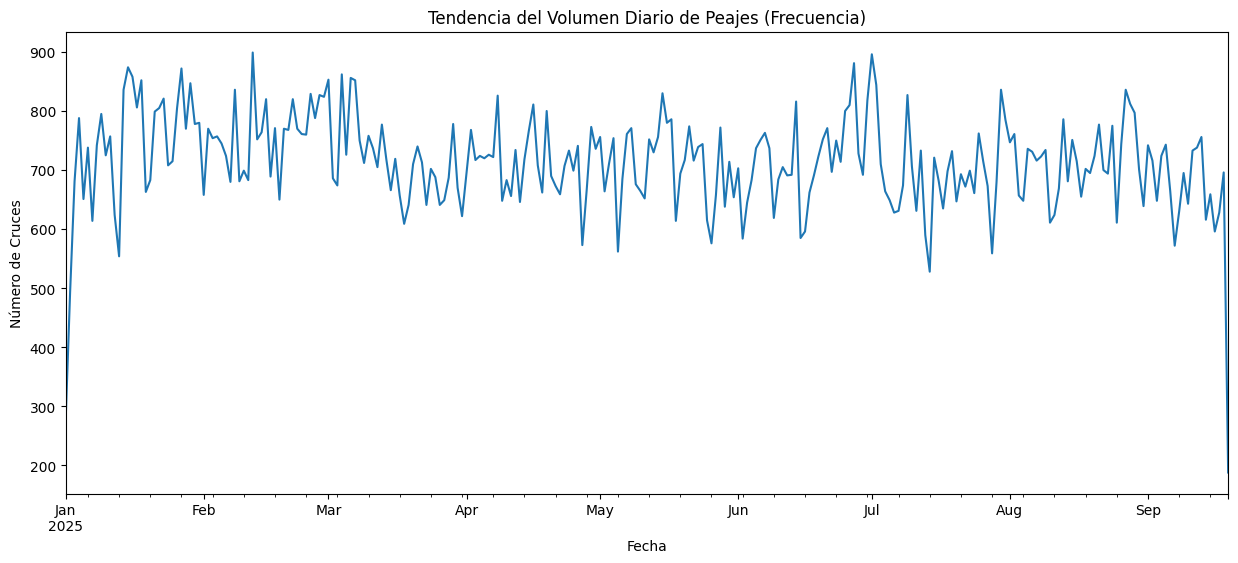

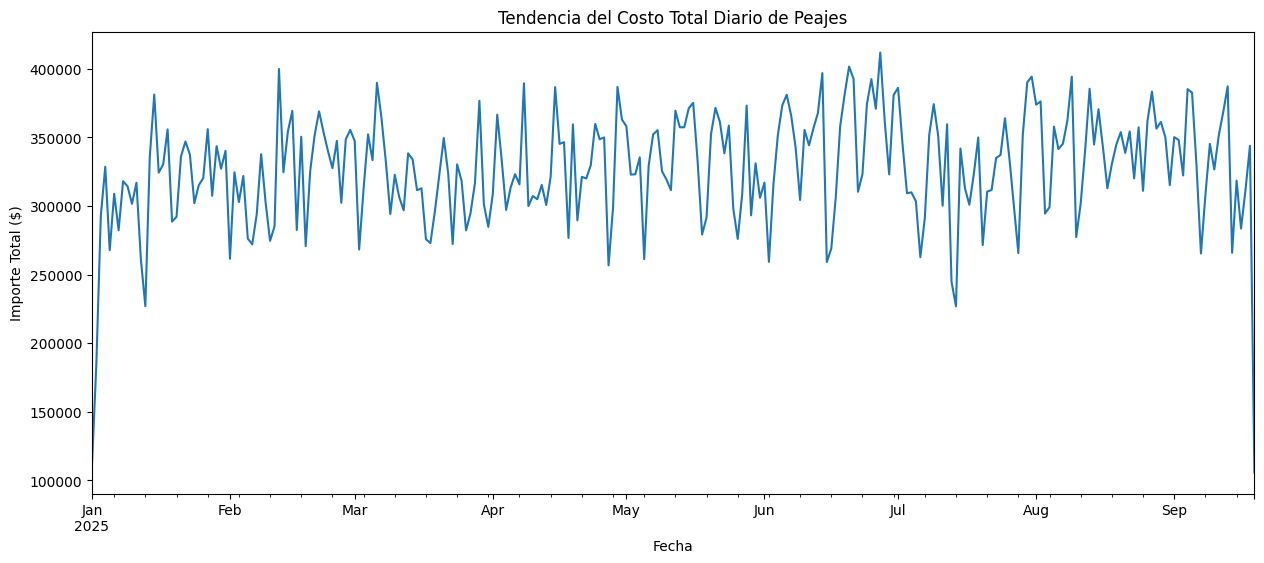

In [ ]:
peajes_ts = peajes.set_index('Fecha')

datos_diarios = peajes_ts.resample('D').agg({
    'Importe': 'sum',      # Costo total diario de peajes
    'Tag': 'count'         # Volumen diario de cruces
}).rename(columns={'Tag': 'Volumen_Peajes'})

#serie de tiempo del volumen
plt.figure(figsize=(15, 6))
datos_diarios['Volumen_Peajes'].plot(title='Tendencia del Volumen Diario de Peajes (Frecuencia)')
plt.ylabel('Número de Cruces')
plt.show()

# serie de tiempo del iMPORTE
plt.figure(figsize=(15, 6))
datos_diarios['Importe'].plot(title='Tendencia del Costo Total Diario de Peajes')
plt.ylabel('Importe Total ($)')
plt.show()

### Series de tiempo

En esta serie se puede observar  que tanto el número de cruces como el costo total de peajes mantienen un comportamiento muy similar y estable a lo largo del año, con variaciones normales del día a día pero sin cambios importantes en la tendencia general. Esto se puede interpretar como que el flujo de tránsito y los costos para Bepensa se comportan de manera constante durante todo el periodo analizado.


### Importe

En los histogramas de esta variable se puede observar que existe una distribución multimodal, lo que significa que hay varios grupos de importes con distintos rangos de frecuencia. La mayor concentración se encuentra en importes bajos (entre 100 y 500), mientras que también se observan picos bien definidos alrededor de importes más altos como 1,000, 1,500 y 2,200. Esto indica que los montos de peaje no son continuos, sino que corresponden a tarifas fijas según tramo, caseta o tipo de vehículo.

En cuanto a los boxplots, se puede observar una gran cantidad de outliers, especialmente en los importes más altos. Aunque la mediana está en un rango bajo, la dispersión de valores es considerable debido a diferentes tarifas aplicadas en distintas carreteras o clases de vehículos.

De este análisis se pueden obtener los siguientes insights:

* La presencia de múltiples “picos” sugiere que existen categorías o tipos de peaje bien diferenciados.

* Los outliers no necesariamente son errores: pueden corresponder a tarifas tráilers o autopistas específicas.


### Hora en segundos (Hora_segundos)

En los histogramas se puede observar una distribución bastante uniforme a lo largo del día, con una ligera tendencia a aumentar durante el transcurso del mismo. No se observan concentraciones marcadas en horas específicas, aunque sí se aprecia una caída en los extremos (cerca de la medianoche y primeras horas del día).

En cuanto a los boxplots, se puede observar que la distribución de la variable es amplia pero sin presencia significativa de outliers. Esto refleja que los registros abarcan todo el rango horario de forma equilibrada.

De este análisis se pueden obtener los siguientes insights:

* La circulación por peajes ocurre durante todo el día, sin horarios con picos demasiado marcados.

* La ligera caída al inicio y final del día sugiere menor actividad en madrugada y primeras horas de la mañana.

### Frecuencia de Caseta

En la gráfica de barras se puede observar que existe una caseta con una frecuencia muy superior al resto: “CTO EXT MEXIQUENSE”, la cual registra más de 35,000 cruces. El resto de las casetas presenta frecuencias mucho más bajas y distribuidas de forma relativamente pareja entre los 5,000 y 10,000 registros.

Este patrón muestra que una sola caseta concentra una parte significativa del tráfico registrado en el dataset, mientras que las demás tienen un flujo considerable pero más distribuido.

De este análisis se pueden obtener los siguientes insights:

* La caseta CTO EXT MEXIQUENSE es claramente un punto crítico en la operación, posiblemente por ubicación estratégica o porque conecta tramos de alto tránsito al menos para este dataset

* Las casetas restantes tienen volúmenes más balanceados, lo que sugiere rutas diversificadas. (al menos para este dataset)

* Esta concentración puede ayudar a priorizar monitoreo, mantenimiento o análisis de eficiencia en esa caseta específica.

###**KPI´s**
* **Costo Total de Peaje por Viaje**:
Suma total por tracto de todos los pagos realizados en casetas para pejaes. Este KPI nos indicará la estructura de costos por ruta de cada tracto a identificar si existen rutas már rápidas pero caras, o bien, baratas pero lentas.

* **Variabilidad del Tiempo entre Peajes**: Cuánta variabilidad hay entre todos los tractos de cuánto tiempo pasa entre un peaje y otro. Si exite mucha variablidad significa que hay más incertidumbre en las operaciones, osea rutas más riesgosas.

* **Predicción de Congestión por Peaje**: Se basará en patrones históricos de cuánto tiempo se tarda cada peaje para identificar congestiones estacionales. Nos permitirá anticipar retrasos antes de que el tracto los experimente, reducirá incertidumbre y mejorará el tiempo de las rutas.

* **Ruta Óptima según Costo + Tiempo**: Nos permitirá encontrar la ruta que minimizará el costo en peajes, el tiempo transcurrido en ellos y la congestión esperada. Será fundamental para mejorar la rentabilidad y el cumplimiento de cada tracto, además de que mezcla varias categorías en la red nomologica: factores exógenos, capacidad operacionesl, rendimiento operacional y la gestión de la demanda.

## Combustible

### **Intrucciónes**
1. En un solo archivo de excel, agregamos las consultas de combustible de la plataforma, una por hoja, sin importar la extención de cada consulta.
2. Cargamos el excel y empezamos su exploración, se debe actualizar el `file_path` con la ruta del documento que se cargue.

###`file_path`

In [ ]:
file_path = '/content/Combustible.xlsx'

In [ ]:
# Revisamos el contenido del excel suministrado
xls = pd.ExcelFile(file_path)
sheets = xls.sheet_names
print(f'La cantidad de hojas son: {len(sheets)}\nLos nombres de las hojas son: {sheets}')

La cantidad de hojas son: 3
Los nombres de las hojas son: ['Enero-febrero_2025_Combustible', 'Agosto_Combustible', 'Septiembre_2025_Combustible']


Definimos funciones para limpiar las hojas, y ponerlo todo en un solo Data Frame y hacer el analisis del mismo.

In [ ]:
NO_COM_FIELDS = ['No_Comprobante']

def clean_colname(c):
  '''Normaliza nombres de columna: strip, reemplaza saltos y espacios por guión bajo.'''
  if pd.isna(c):
    return 'unnamed'
  c = str(c).strip()
  c = c.replace('\n', ' ').replace('\r', ' ')
  # Reemplaza caracteres no alfanuméricos (excepto guión bajo) por guión bajo
  import re
  c = re.sub(r'[^\w]+', '_', c, flags = re.UNICODE)
  c = c.strip('_')
  if c == '':
    return 'unnamed'
  return c

def detect_header_row(xls, sheet, max_rows_check=30):
  '''Leer primeras filas sin header y escoger la fila con más no-nulls.'''
  df_preview = pd.read_excel(xls, sheet_name = sheet, header = None, nrows = max_rows_check)
  non_null_counts = df_preview.notna().sum(axis = 1)
  best_idx = non_null_counts.idxmax()
  return best_idx

def find_no_com_column(cols):
  '''Buscar la columna de comprobante.'''
  cols_lower = {c.lower(): c for c in cols}
  for cand in NO_COM_FIELDS:
    if cand.lower() in cols_lower:
      return cols_lower[cand.lower()]
  # si no coincide exacto, intentar contains
  for cand in NO_COM_FIELDS:
    for c in cols:
      if cand.lower().replace('_','') in c.lower().replace('_',''):
        return c
  return None

Hacemos que todas las hojas se almacenen en un solo DF.

In [ ]:
# Declaramos listas vacias para almacenar resultados por hoja y para concatenar.
cleaned_sheets = []
summary_files = []

# Con un ciclo "FOR" analizamos y limpiamos las diferentes hojas dentro del excelsuministrado.
for sheet in sheets:
  print('\n--- Procesando hoja:', sheet)
  # Detectamos fila de header
  header_row = detect_header_row(xls, sheet, max_rows_check = 30)
  print('  fila detectada como header (index):', header_row)
  df = pd.read_excel(xls, sheet_name=sheet, header = header_row)
  # Normalizamos los nombres
  df.columns = [clean_colname(c) for c in df.columns]
  print('  columnas (muestra):', df.columns.tolist()[:8])
  # Eliminamos filas totalmente vacías
  df = df.dropna(how = "all").reset_index(drop = True)
  # Detectamos la columna No_Comprobante en este dataframe
  no_com_col = find_no_com_column(df.columns.tolist())
  if no_com_col is None:
    print("No se encontró columna 'No_Comprobante' entre las variantes. Se continuará sin filtrar por comprobante.")
  else:
    # Eliminamos filas con NaN o cadenas vacías/espacios en No_Comprobante
    before = df.shape[0]
    df = df[df[no_com_col].notna()]
    df = df[df[no_com_col].astype(str).str.strip() != ""]
    df = df.reset_index(drop = True)
    after = df.shape[0]
    print(f'  Filtrado No_Comprobante: eliminado {before-after} filas; filas restantes: {after}')

  # Generamos un resumen de Quality Control
  qc = pd.DataFrame({
      'column': df.columns,
      'dtype_before': [str(df[c].dtype) for c in df.columns],
      'n_nulls': df.isna().sum().values,
      'pct_nulls': (df.isna().sum().values / len(df) * 100).round(2),
      'n_unique': [df[c].nunique(dropna = True) for c in df.columns]
      }).sort_values('pct_nulls', ascending = False)
  summary_files.append(qc)

  # Detectamos columnas que sean candidatas a convertirse en numéricas
  num_candidates = []
  for c in df.columns:
    s = df[c].astype(str).str.replace(',', '.', regex = False)
    conv = pd.to_numeric(s, errors = 'coerce')
    pct_num = conv.notna().sum() / len(conv) * 100
    if pct_num > 60:
      num_candidates.append(c)

  print('Candidatas a numéricas:', num_candidates)

  # Detectamos columans que sean candidatas a convertirse en fecha
  date_candidates = []
  for c in df.columns:
      # nombre con 'fecha'/'date'/'mes'
      name_lower = c.lower()
      if any(k in name_lower for k in ['fecha', 'date', 'mes', 'periodo', 'anio', 'año']):
          date_candidates.append(c)

  print('Candidatas a fecha:', date_candidates)

  # Generamos un nuevo df con las columans convertidas
  df_conv = df.copy()
  # Convertir a numéricas las candidatas
  for c in num_candidates:
    s = df_conv[c].astype(str).str.replace(",", ".", regex=False)
    df_conv[c + '_num'] = pd.to_numeric(s, errors = 'coerce')

  # Convertir a fechas las candidatas
  for c in date_candidates:
    try:
      df_conv[c + '_dt'] = pd.to_datetime(df_conv[c], errors = 'coerce', dayfirst = True)
    except Exception as e:
      print('No se pudo convertir', c, e)

  # Eliminamos la columna original.
  df_conv = df_conv.drop(columns = num_candidates + date_candidates)

  # Guardamos las hojas ya limpias.
  cleaned_sheets.append((sheet, df_conv))

  # Hacemos un Data Dictionary preliminar.
  dd = []
  for c in df_conv.columns:
    sample_val = df_conv[c].dropna().astype(str).head(5).tolist()
    dd.append({
        'column': c,
        'dtype': str(df_conv[c].dtype),
        'n_nulls': int(df_conv[c].isna().sum()),
        'pct_nulls': round(df_conv[c].isna().sum() / len(df_conv) * 100, 2),
        'n_unique': int(df_conv[c].nunique(dropna=True)),
        'sample_values': '; '.join(sample_val)
        })
  dd_df = pd.DataFrame(dd)


--- Procesando hoja: Enero-febrero_2025_Combustible
  fila detectada como header (index): 7
  columnas (muestra): ['Id_Grupo_Región', 'Grupo_Región', 'Id_Región', 'Región', 'Id_Centro_costos', 'Centro_Costos', 'Num_Tarjeta', 'Id_Vehículo']
  Filtrado No_Comprobante: eliminado 9567 filas; filas restantes: 4328
Candidatas a numéricas: ['Id_Grupo_Región', 'Id_Región', 'Num_Tarjeta', 'No_Comprobante', 'Código_Pemex', 'Certificación_Cualli', 'Km_Ant_Transacción', 'Km_Transacción', 'Recorrido', 'Rendimiento_Vehículo', 'Rendimiento_Real', 'Capacidad_de_Tanque', 'Mercancía', 'Cantidad_Mercancía', 'Precio_Unitario_Merc', 'Saldo_Ant_Transacción', 'Saldo_Actual_Después_de_Transacción', 'Importe_Neto', 'Monto_IVA', 'IVA', 'Importe_Transacción', 'Id_Terminal', 'Id_Transacción']
Candidatas a fecha: ['Fecha_transacción']

--- Procesando hoja: Agosto_Combustible
  fila detectada como header (index): 7
  columnas (muestra): ['Id_Grupo_Región', 'Grupo_Región', 'Id_Región', 'Región', 'Id_Centro_costos',

In [ ]:
# Volvemos la lista summary_files en un DF.
summary_files = pd.concat(summary_files)
summary_files

,column,dtype_before,n_nulls,pct_nulls,n_unique
33,TAR,float64,4328,100.0,0
34,Monto_descuento,float64,4328,100.0,0
42,Parámetro_Personalizado1,float64,4328,100.0,0
46,Parámetro_Personalizado5,float64,4328,100.0,0
44,Parámetro_Personalizado3,float64,4328,100.0,0
...,...,...,...,...,...
36,Tipo_Tarjeta,object,0,0.0,1
35,Estado_Transacción,object,0,0.0,5
32,Importe_Transacción,float64,0,0.0,609
40,Conductor,object,0,0.0,1


In [ ]:
# Extraemos solamente los dataframes para concatenar
df_list = [df_conv for (_, df_conv) in cleaned_sheets]
if len(df_list) > 0:
  combined = pd.concat(df_list, axis = 0, ignore_index = True, sort = False)

  # QC combinada
  qc_comb = pd.DataFrame({
      'column': combined.columns,
      'dtype_after': [str(combined[c].dtype) for c in combined.columns],
      'n_nulls': combined.isna().sum().values,
      'pct_nulls': (combined.isna().sum().values / len(combined) * 100).round(2),
      'n_unique': [combined[c].nunique(dropna=True) for c in combined.columns]
  }).sort_values('pct_nulls', ascending=False)



combined.shape

(7602, 49)

In [ ]:
# Eliminamos todas las columans que tengan el 100% de valores nulos
combined = combined.dropna(axis = 1, how = 'all')
combined.shape

(7602, 41)

In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7602 entries, 0 to 7601
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Grupo_Región                             7602 non-null   object        
 1   Región                                   7602 non-null   object        
 2   Id_Centro_costos                         7602 non-null   object        
 3   Centro_Costos                            7602 non-null   object        
 4   Id_Vehículo                              7602 non-null   object        
 5   Descripción_Vehículo                     7602 non-null   object        
 6   Tipo_Transacción                         7602 non-null   object        
 7   Razón_social_Afiliado                    7602 non-null   object        
 8   Estado_Ciudad_de_Transacción             7602 non-null   object        
 9   Descripción_Mercancía                    

In [ ]:
combined.describe().T

,count,mean,min,25%,50%,75%,max,std
Id_Grupo_Región_num,7602.0,1.957643,1.0,2.0,2.0,2.0,2.0,0.201416
Id_Región_num,7602.0,6.366877,4.0,4.0,5.0,7.0,12.0,2.521472
Num_Tarjeta_num,7602.0,6363180025741509.0,6363180008293860.0,6363180024535138.0,6363180027117207.0,6363180029303425.0,6363180033106699.0,5771655.805537
No_Comprobante_num,7602.0,6798.367009,4.0,1957.5,4238.0,8827.5,862760.0,15297.200024
Código_Pemex_num,7602.0,55223.852276,0.0,1.0,1.0,114034.0,117644.0,56625.001452
Certificación_Cualli_num,7602.0,0.075375,0.0,0.0,0.0,0.0,1.0,0.264013
Km_Ant_Transacción_num,7596.0,931610.159031,0.0,233959.0,625574.5,927037.0,109976712.0,2932087.519743
Km_Transacción_num,7602.0,945452.577085,0.0,233962.25,627666.5,928033.25,109976713.0,3183968.998203
Recorrido_num,7596.0,14520.36664,-38068582.0,1.0,1.0,599.25,98979001.0,1356431.894811
Rendimiento_Vehículo_num,7602.0,2.460076,2.0,2.5,2.5,2.5,12.0,0.308143


### Graficas correspondientes a los datos de interes del analisis.

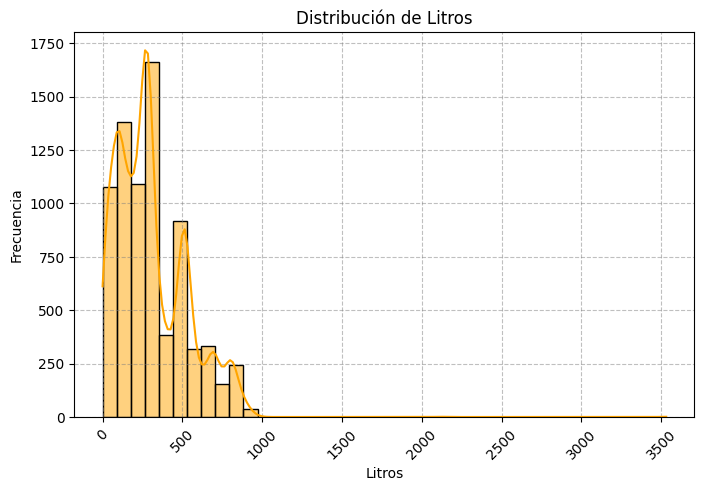

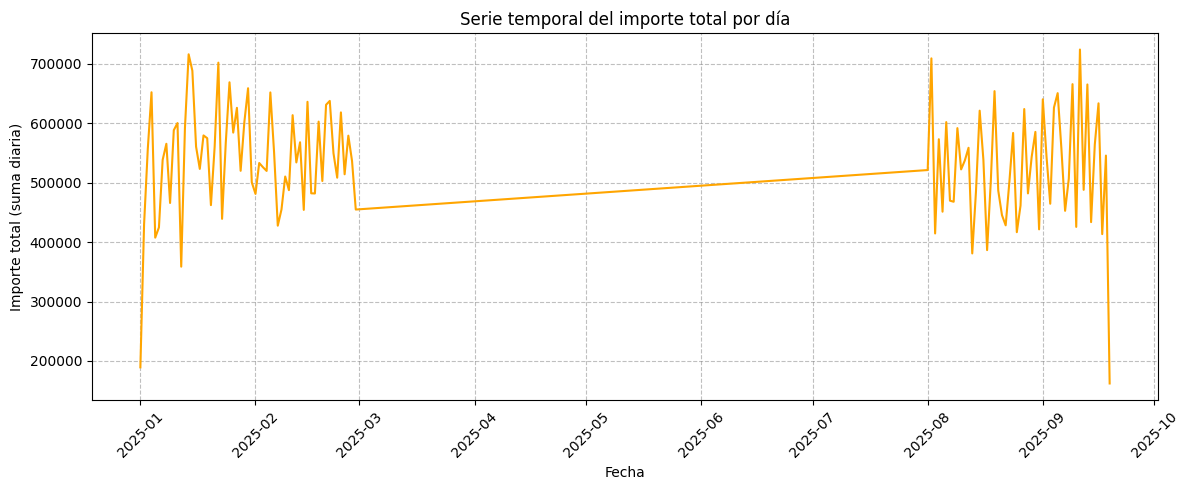

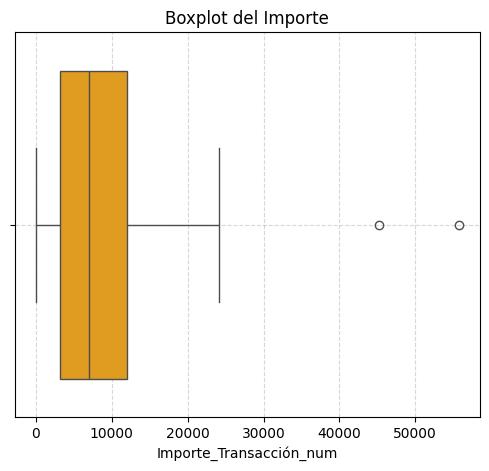

In [ ]:
col_importe = 'Importe_Transacción_num'
col_litros = 'Cantidad_Mercancía_num'
col_fecha = 'Fecha_transacción_dt'

plt.figure(figsize=(8,5))
sns.histplot(combined[col_litros].dropna(), bins=40, kde = True, color = 'orange')
plt.title('Distribución de Litros')
plt.xlabel('Litros')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle="--", alpha=0.5, color='gray')
plt.xticks(rotation=45)
plt.show()
print()
df_ts = combined.dropna(subset=[col_fecha, col_importe])
df_daily = df_ts.groupby(df_ts[col_fecha].dt.date)[col_importe].sum()

plt.figure(figsize=(12,5))
plt.plot(df_daily.index, df_daily.values, color = 'orange')
plt.title('Serie temporal del importe total por día')
plt.xlabel('Fecha')
plt.ylabel('Importe total (suma diaria)')
plt.grid(True, linestyle="--", alpha=0.5, color = 'gray')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print()

plt.figure(figsize=(6,5))
sns.boxplot(x = combined[col_importe], color = 'orange')
plt.title('Boxplot del Importe')
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#### Observaciónes

**En la gráfica de distribución de litros:**

La mayoría de los datos se encuentran dentro de lo esperado, debido a que tenemos tanques de gasolina alrededor de los 1200L, sin embargo, se encuentran datos por encima de los 3500L surtidos, por lo que habrá que hacer una investigación sobre este dato en específico.

**En la gráfica Serie temporal del importe total por día:**

Encontramos en este análisis, que a lo largo del tiempo se han hecho cargos consistentemente entre los \$400,000 y \$700,000 por lo que a primera vista no se presentan anomalías en este sentido.

**En la gráfica Boxplot del Importe:**

Tomando en cuenta el precio por litro de gasolina y las cantidades de combustible solicitadas, en su mayoría podemos suponer que en el Box Plot los datos no se encuentran fuera de lo normal y confirmamos que ha habido transacciones que pudieran corresponder al dato de 3500 representado en la gráfica de distribución de litros.


### Outliers
Detectamos los outliers en las variables numéricas

In [ ]:
outlier_report = {}

def detect_outliers(series, name):
    s = series.dropna()
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    bajo = Q1 - 1.5 * IQR
    alto = Q3 + 1.5 * IQR

    mask = (s < bajo) | (s > alto)

    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Umbral_bajo': bajo,
        'Umbral_alto': alto,
        'Outliers_Cantidad': mask.sum(),
        'Outliers_Porcentaje': round(mask.mean() * 100, 2)
    }

outlier_report['Importe'] = detect_outliers(combined[col_importe], col_importe)

outlier_report['Litros'] = detect_outliers(combined[col_litros], col_litros)

outlier_report = pd.DataFrame(outlier_report)
outlier_report

,Importe,Litros
Q1,3120.7350,127.850
Q3,11985.7500,464.000
IQR,8865.0150,336.150
Humbral_bajo,-10176.7875,-376.375
Humbral_alto,25283.2725,968.225
Outliers_Cantidad,2.0000,2.000
Outliers_Porcentaje,0.0300,0.030


#### Observaciones

Podemos observar que existen datos, en el umbral bajo, que salen completamente de la normalidad ya que son negativos y no debieran existir. Esto tambien lo observamos desde que se hizo el `describe` de las variables y es un dato que se debiera corroborar para saber lo que significa.

### Gráficas para costo por litro y series de litros

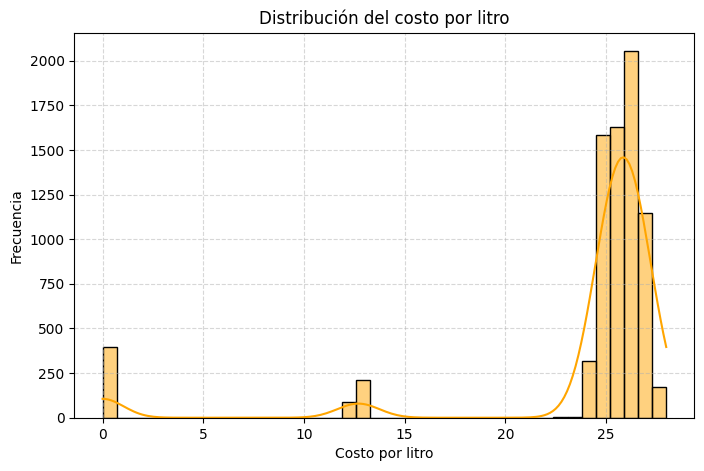

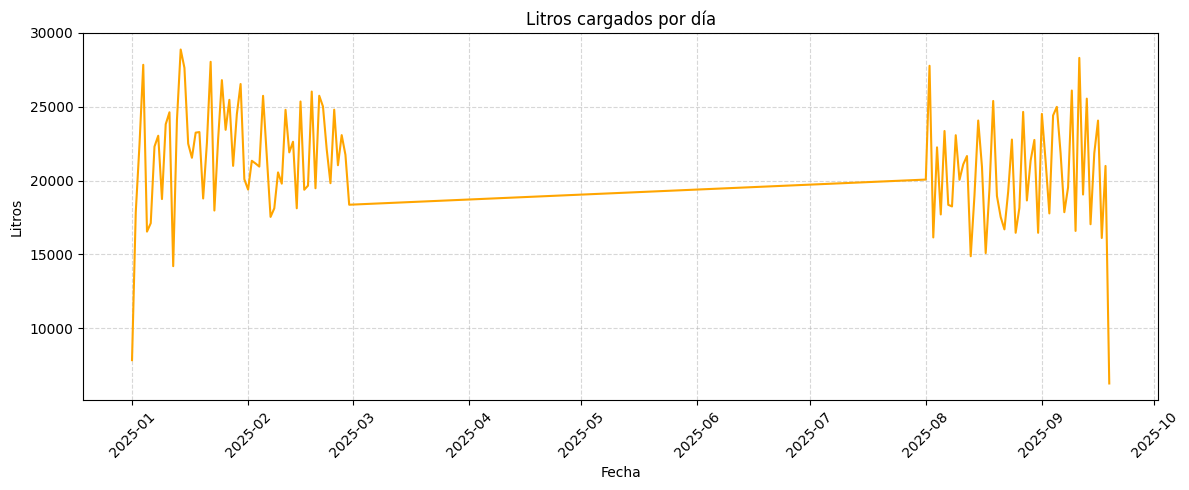

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(combined['Precio_Unitario_Merc_num'].dropna(), bins=40,kde = True, color = 'orange')
plt.title('Distribución del costo por litro')
plt.xlabel('Costo por litro')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
print()

df_daily_l = combined.groupby(combined[col_fecha].dt.date)[col_litros].sum()
plt.figure(figsize=(12,5))
plt.plot(df_daily_l.index, df_daily_l.values, color = 'orange')
plt.title('Litros cargados por día')
plt.xlabel('Fecha')
plt.ylabel('Litros')
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observaciones

**En la gráfica Distribución del costo por litro:**
Podemos observar transacciónes por combustible en valores de \$0 por transacciónes que fueron rechazadas y al rededor de los \$13, lo que no corresponde con el precio por litro en el pais. Se debe profundzar en la información con Bepensa para corroborar las razones de estos precios o a que refieren ya que son cargados al centro de costos de combustible y pagados con tarjetas de vales de gasolina.

**En la gráfica Litros cargados por día:**
Confirmamos que el comportamiento es correspondiente con la serie temportal de importe total por día.

### Agrupaciones clave (vehículo, operador, estación, región)

In [ ]:
dfg = combined.copy()

# Consumo de cada veiculo por mes
dfg['Año_Mes'] = dfg['Fecha_transacción_dt'].dt.to_period('M')

consumo_por_vehiculo_mensual = (
    dfg.groupby(['Id_Vehículo', 'Año_Mes'])['Mercancía_num']
    .sum()
    .reset_index()
    .sort_values(['Id_Vehículo', 'Año_Mes'], ascending = [True, True])
)

costo_por_vehiculo_mensual = (
    dfg.groupby(['Id_Vehículo', 'Año_Mes'])['Importe_Transacción_num']
    .sum()
    .reset_index()
    .sort_values(['Id_Vehículo', 'Año_Mes'], ascending = [True, True])
)

consumo_por_region_mensual = (
    dfg.groupby(['Año_Mes', 'Región'])['Importe_Transacción_num']
    .sum()
    .reset_index()
    .sort_values(['Año_Mes', 'Región'], ascending = [True, True])
)

consumo_por_vehiculo_mensual, costo_por_vehiculo_mensual, consumo_por_region_mensual

(    Id_Vehículo  Año_Mes  Mercancía_num
 0         0T539  2025-01          618.0
 1         0T539  2025-02          824.0
 2         0T539  2025-08          927.0
 3         0T539  2025-09          515.0
 4          T298  2025-01          515.0
 ..          ...      ...            ...
 683      TP1114  2025-01         1751.0
 684      TP1114  2025-02         1545.0
 685      TP1114  2025-09          103.0
 686      TP1115  2025-01         1648.0
 687      TP1115  2025-02          206.0
 
 [688 rows x 3 columns],
     Id_Vehículo  Año_Mes  Importe_Transacción_num
 0         0T539  2025-01                 80447.75
 1         0T539  2025-02                122160.41
 2         0T539  2025-08                152396.85
 3         0T539  2025-09                 60762.71
 4          T298  2025-01                 24094.74
 ..          ...      ...                      ...
 683      TP1114  2025-01                 75473.92
 684      TP1114  2025-02                 62942.02
 685      TP1114  2025

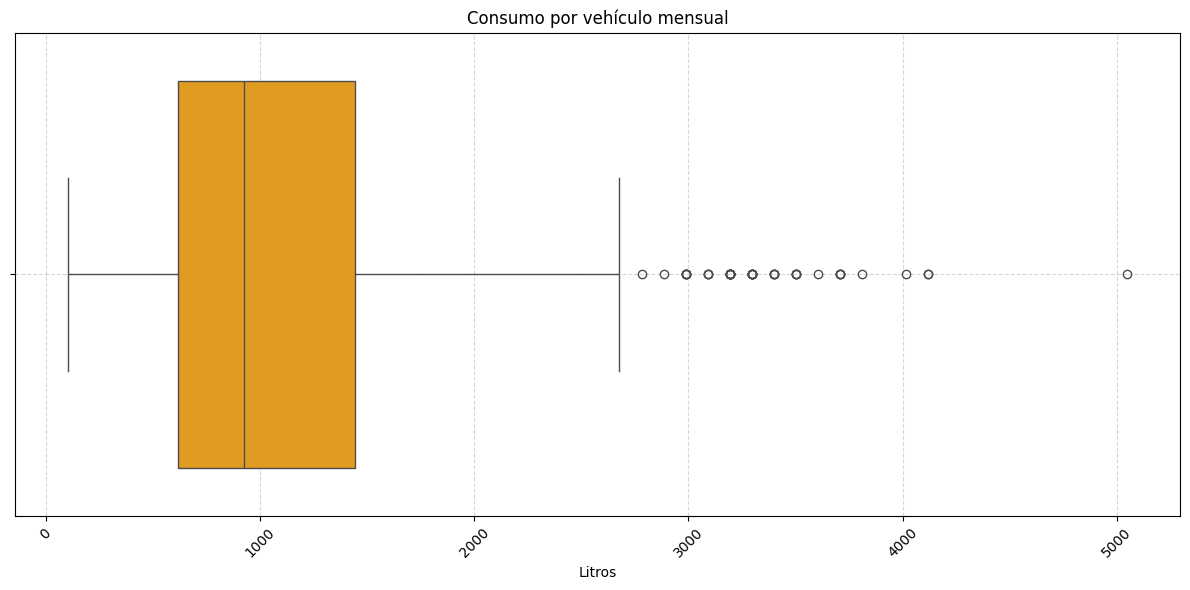

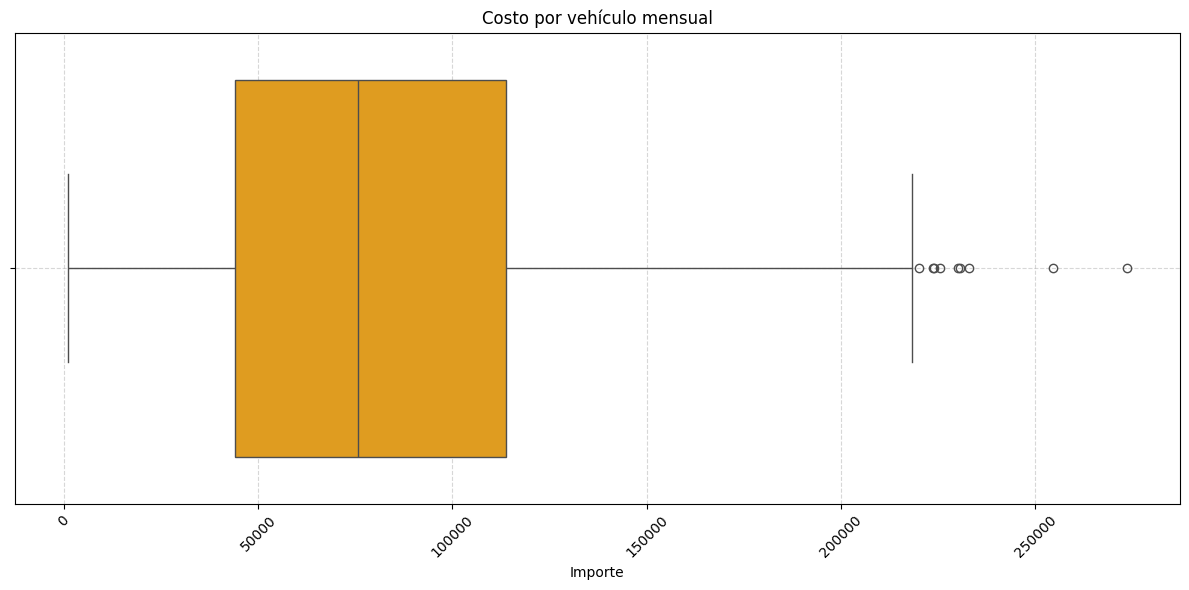

In [ ]:
# Generamos boxplots de dos de las tres agrupaciones que acabamos de hacer.

# Boxplot consumo_por_vehiculo_mensual
plt.figure(figsize=(12, 6))
sns.boxplot(x = consumo_por_vehiculo_mensual['Mercancía_num'], color = 'orange')
plt.title('Consumo por vehículo mensual')
plt.xlabel('Litros')
plt.grid(True, linestyle="--", alpha = 0.5)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()
print()

# Boxplot costo_por_vehiculo_mensual
plt.figure(figsize=(12, 6))
sns.boxplot(x = costo_por_vehiculo_mensual['Importe_Transacción_num'], color = 'orange')
plt.title('Costo por vehículo mensual')
plt.xlabel('Importe')
plt.grid(True, linestyle="--", alpha = 0.5)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

#### Observaciones

Revisando las gráficas, observamos que hay datos anomalos en los costos por vehículo y los consumos de vehículo, habiendo algunos que consumen significativamente más combustible que el grueso de las unidades. Esto se puede deber a la alta eficiencia de las unidades en cuanto a kilómetros recorridos o un bajo rendimiento de kilometros por litro.

Con la agrupación de `consumo_por_region_mensual` podemos ver de manera decendente cuales fueron las regiones en las que hubo un mayor consumo de combustible, lo que nos ayuda a generara alertas de alta demanda, altos precios de combustible (por lo que habri que evitar dentro de lo posible la recarga en estas zonas), o posible perdida de rendimiento de las unidades.

### Modelado de Consumo (Indicadores Operativos)

In [ ]:
dfg['Dia'] = dfg['Fecha_transacción_dt'].dt.date
dfg['Mes'] = dfg['Fecha_transacción_dt'].dt.to_period('M')

eficiencia_mensual = (
  dfg.groupby(['Id_Vehículo', 'Mes'])
    .agg({
        'Mercancía_num': 'sum',
        'Importe_Transacción_num': 'sum',
        'Recorrido_num': 'sum',
        'Rendimiento_Real_num': 'sum'
    })
    .reset_index()
    )

eficiencia_mensual

,Id_Vehículo,Mes,Mercancía_num,Importe_Transacción_num,Recorrido_num,Rendimiento_Real_num
0,0T539,2025-01,618.0,80447.75,6.0,0.019085
1,0T539,2025-02,824.0,122160.41,18.0,0.028734
2,0T539,2025-08,927.0,152396.85,10056.0,13.429686
3,0T539,2025-09,515.0,60762.71,5931.0,10.149185
4,T298,2025-01,515.0,24094.74,191.0,1.640695
...,...,...,...,...,...,...
683,TP1114,2025-01,1751.0,75473.92,-12.0,-0.061131
684,TP1114,2025-02,1545.0,62942.02,100.0,0.613382
685,TP1114,2025-09,103.0,3898.50,1.0,0.006667
686,TP1115,2025-01,1648.0,73092.15,6261.0,44.209628


Con esta tabla buscamos ofrecer al cliente una mayor visibilidad de la eficiencia por vehículo por mes.

### **KPI's**

* **Costo Total de Combustible por Viaje:** Indica cuánto se gastó en combustible por cada recorrido.
Ayuda a identificar rutas costosas, comparar tractos entre sí y detectar desviaciones de consumo anormal.

* **Rendimiento del Tracto (km/L):** Mide cuántos kilómetros recorre cada unidad por litro de combustible.

  Permite detectar:
  * Unidades con fallas mecánicas
  * Malas prácticas de conducción
  * Condiciones de ruta que afectan el consumo

* **Predicción de Consumo de Combustible:** Modelo que estime el consumo semanal o mensual según:

  * Ruta
  * Peso estimado
  * Historial previo

  Permite detectar futuros picos, planear compras y optimizar el presupuesto de combustible.

### **Conclusiones generales**

El análisis exploratorio realizado permitió identificar tendencias importantes en los datos operativos, así como áreas críticas relacionadas con su calidad y consistencia. En el caso del dataset de Telemetría, se observó una relación coherente entre variables clave como distancia recorrida, duración de conducción y porcentaje de tiempo en movimiento, lo cual sugiere un sistema de registro estable. No obstante, se detectó la presencia de valores extremadamente altos en duración y distancia, lo que podría deberse a registros incompletos o condiciones operativas atípicas.

En el dataset de Peajes, la estructura general es consistente, aunque se identificó un número significativo de valores nulos en variables específicas que no afectan directamente el análisis principal. La concentración de un alto volumen de cruces en determinadas casetas pone de manifiesto posibles puntos estratégicos o cuellos de botella en la red de rutas, lo cual es relevante para la planeación de operaciones y el análisis de eficiencia.

El análisis del dataset de Combustible reveló patrones estables de consumo por día y por región, además de ciertos valores anómalos en litros cargados y precios por litro que requieren validación adicional. Asimismo, las agrupaciones por vehículo y por región permitieron identificar diferencias relevantes en consumo, costo y rendimiento, indicando oportunidades para revisar prácticas operativas, desempeño por unidad y estrategias de abastecimiento.

En conjunto, los tres análisis permiten construir una visión integral del comportamiento de la flota, los costos operativos y la eficiencia de las rutas. Además, los KPIs propuestos ofrecen una base sólida para la creación de modelos predictivos de demanda, optimización de recursos y análisis operativo. Como resultado, este EDA representa un primer paso fundamental para fortalecer la toma de decisiones y la planeación logística basada en datos dentro de la empresa.